In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

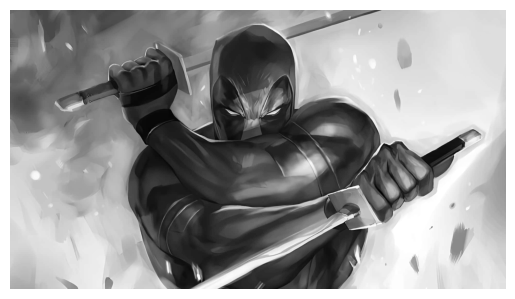

In [65]:
image = cv2.imread('image.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [66]:
def plot_histogram(hist):
    plt.plot(hist, color="black")
    plt.xlim([0, 256])
    plt.title("Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()

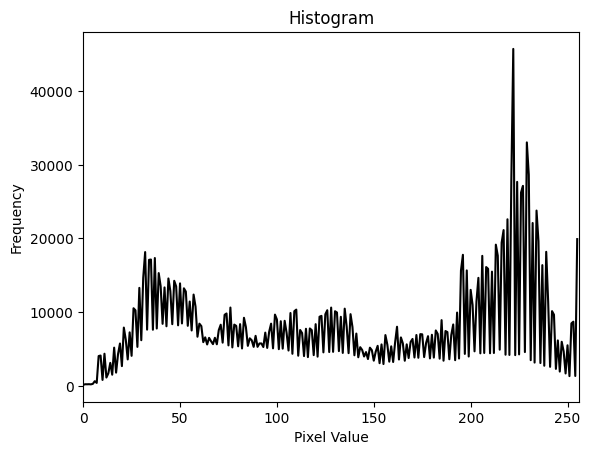

In [67]:
hist = []
for i in range(256):
    hist.append(np.sum(image == i))
plot_histogram(hist)

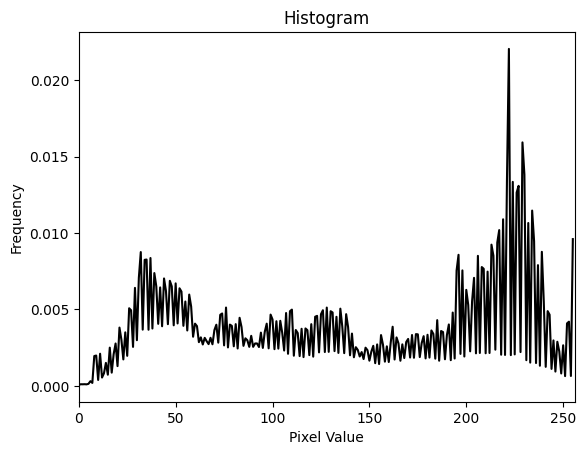

In [68]:
normalized_hist = [h / sum(hist) for h in hist]
plot_histogram(normalized_hist)

In [69]:
# Initialize lists to store results
probabilities_background = []
probabilities_foreground = []
means_background = []
means_foreground = []
intra_class_variances = []

# Iterate through all possible threshold values
for threshold in range(256):
    # Split the histogram probabilities into two classes
    prob_background = sum(normalized_hist[:threshold])
    prob_foreground = sum(normalized_hist[threshold:])
    
    # Avoid division by zero
    if prob_background == 0 or prob_foreground == 0:
        probabilities_background.append(prob_background)
        probabilities_foreground.append(prob_foreground)
        means_background.append(0)
        means_foreground.append(0)
        intra_class_variances.append(float('inf'))
        continue
    
    # Compute the means of the two classes
    mean_background = sum(i * normalized_hist[i] for i in range(threshold)) / prob_background
    mean_foreground = sum(i * normalized_hist[i] for i in range(threshold, 256)) / prob_foreground
    
    # Compute the intra-class variance
    variance_background = sum(((i - mean_background) ** 2) * normalized_hist[i] for i in range(threshold)) / prob_background
    variance_foreground = sum(((i - mean_foreground) ** 2) * normalized_hist[i] for i in range(threshold, 256)) / prob_foreground
    intra_class_variance = prob_background * variance_background + prob_foreground * variance_foreground
    
    # Store the results
    probabilities_background.append(prob_background)
    probabilities_foreground.append(prob_foreground)
    means_background.append(mean_background)
    means_foreground.append(mean_foreground)
    intra_class_variances.append(intra_class_variance)

In [70]:
optimal_threshold = np.argmin(intra_class_variances)
print(f"The optimal threshold is: {optimal_threshold}")

The optimal threshold is: 141


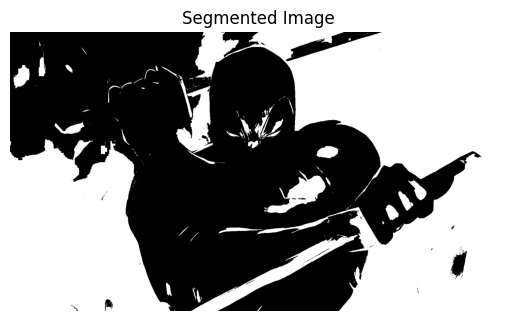

In [71]:
segmented_image = (image > optimal_threshold).astype(np.uint8) * 255
plt.imshow(segmented_image, cmap="gray")
plt.axis("off")
plt.title("Segmented Image")
plt.show()